##  Regresja liniowa

Regresja liniowa to tworzenie modeli przedstawiających wielkość, której wartość chcemy przewidzieć (zmienna zależna) jako kombinację liniową predyktorów (zmiennych zależnych).

Struktura modelu ma postać

$$\tilde{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n$$

lub w formie macierzowej 

$$\tilde{\mathbf{y}} = \mathbf{[1\  X ]} \beta$$

gdzie wektor wartości zmiennych zależnych jest przewidywany na podstawie macierzy danych i wektora współczynników $\beta$.

Współczynnik $\beta_0$ w nomentkalturze anglojęzycznej jest nazywany *intercept* ponieważ jest to punkt przecięcia się z osią $y$ gdy wszystkie predyktory są równe 0.

Aby wyznaczyć parametry modelu liniowego potrzebujemy wektora danych uczących, tj. znanych nam wartości zmiennej zależnej  $\mathbf{y}$ oraz odpowiadająxcej mu macierzy predyktorów $\mathbf{X}$. Macierz predyktorów nosi nazwę *design matrix*, i bardzo użytyeczne do jej wyznaczenia (w oparciu o dane w forme dataframe) jest pakiet [patsy](https://patsy.readthedocs.io/en/latest/quickstart.html), a w szczególności funkcja ```dmatrices```.


Model regresyjny ma mocne umocowanie statystyczne, jednak w ramach zajęć będziemy traktować go machinistycznie jak jedną z metod uczenia maszynowego. Do tworzenia takich modeli służy klasa ```LinearRegression```

Do analizy regresji liniowej wykorzystywać będziemy pakiet ```scikit-learn``` oraz zawarte w nim klasy, głównie w modułach ```linear_model```, ```metrics``` oraz ```model_selection```. 

### Dane uczące i dane testowe

Zazwyczaj rozwiązując problem nie mamy dostępu do dodatkowych danych testowych uzupełniających nasze dane uczące. Dlatego też, popularną praktyką jest podzielenie posiadanego zbioru danych w sposób losowy na dwa zbiory: uczący i testowy. Do tego służy funkcja ```train_test_split``` z modułu ```model_selection```. 



### Zadanie 1
Na podstawie danych zawartych w pliku SCORES.csv wykonaj i oceń regresję liniową, gdzie Twoją daną niezależną (predyktorem) będą godziny poświęcone na przygotowanie, a wynikową uzyskane punkty. Wykonanie zadania powinno składać się z następujących kroków:
1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.
2. Odczytaj dane z pliku SCORES.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.
3. Wykonaj wstępny wykres uzyskanych danych (typu "scatter")
4. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zaleznych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (30%)
5. Utwróz model regresji liniowej za pomocą sklearn.
6. Wypisz i przeanalizuj wyliczone wskaźniki dla modelu: coef_ oraz intercept_. Czym one są i do czego służą?
7. Wykorzystając stworozny model dokonaj predykcji dla części testowej X. Porównaj wynik (y_pred) z posiadanymi danymi (y_test).
8. Wykonaj wykres konfrontujący dane testowe (X_test, y_test; typu "scatter") oraz predykcje (X_test, y_pred; linia prosta)
9. Dokonaj walidacji uzyskanych predykcji wykorzystując metryki: średni błąd bezwzględny (Mean Absolute Error), błąd średniokwadratowy (Mean Squared Error) oraz pierwiastek błędu średniokwadratowego (Root Mean Squared Error).

Następnie utworzony skrypt wykorzystaj na danych zawartych w SBP.csv, gdzie predyktorem będzie wiek, a wynikiem ciśnienie (SBP). Czy uzyskane wyniki z modelu są równie zadowalające?

#### Import niezbędnych bibliotek

In [1]:
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
from typing import Union
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Klasa LinearRegressionExcercise stworzona na potrzeby realizacji zadania nr 1 oraz nr 2:

In [2]:
class LinearRegressionExercise:
    def __init__(self, data: str):
        self.data = pd.read_csv(data)

    def scatter_plot(self, title_: str, x_: str, y_: str):
        self.data.plot.scatter(x = x_, y = y_, title= title_)
        plt.show()

    def do_regression(self,x_column_name: Union[str,list], y_column_name: Union[str,list]):
        self.x_column_name = x_column_name
        self.y_column_name = y_column_name

        self.x = self.data[x_column_name].to_numpy()
        self.y = self.data[y_column_name].to_numpy()
        self.x_train, self.x_test, self.y_train, self.y_test = model_selection.train_test_split(
                                                            self.x,
                                                            self.y, 
                                                            test_size=0.3,
                                                            random_state=30)
        
        if len(self.x_train.shape) == 1:
                    self.x_train = self.x_train.reshape(-1,1)
                    self.x_test = self.x_test.reshape(-1,1)

        regression = linear_model.LinearRegression().fit(self.x_train,self.y_train)
        self.coef = regression.coef_
        self.intercept = regression.intercept_
        self.y_predicted = regression.predict(self.x_test)
        self.mean_abs_error = metrics.mean_absolute_error(self.y_test, self.y_predicted)
        self.mean_square_error = metrics.mean_squared_error(self.y_test, self.y_predicted)
        self.root_mse = np.sqrt(self.mean_square_error)

    def plot_scatter_and_regression(self):
        plt.figure()
        plt.scatter(self.x_test,self.y_test)
        plt.plot(self.x_test,self.y_predicted,'r')
        plt.title("Regresion Model")
        plt.xlabel(self.x_column_name)
        plt.ylabel(self.y_column_name)
        plt.show()

    def print_errors(self):
        print(f"Mean absolute error = {self.mean_abs_error}")
        print(f"Mean squared error = {self.mean_square_error}")
        print(f"Root Mean Squared Error = {self.root_mse} ")

        

In [3]:
ex1_data = LinearRegressionExercise('SCORES.csv')
ex1_data.data.head(3)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27


In [4]:
ex1_data.data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#### Wstępny wykres analizowanych danych:

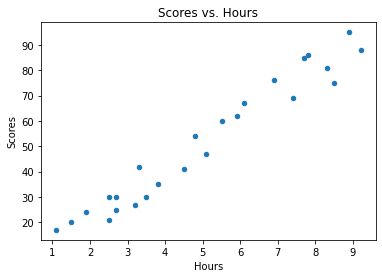

In [5]:
ex1_data.scatter_plot(title_ = "Scores vs. Hours", x_ = "Hours", y_= "Scores")

#### Obliczenie regresji oraz podanie jej współczynników

In [6]:
ex1_data.do_regression(x_column_name="Hours", y_column_name="Scores")

print(f'Regression coefficient: {ex1_data.coef}')
print(f'Intercept: {ex1_data.intercept}')


Regression coefficient: [9.74331031]
Intercept: 3.1671831096872225


#### Porównanie danych testowych z danymi pochodzącymi z predykcji

In [7]:
print(f"y_predicted = {ex1_data.y_predicted}\n")
print(f"y_test = {ex1_data.y_test}\n")
print(f"|y_test - y_predicted| = {np.abs(ex1_data.y_test - ex1_data.y_predicted)}\n")

y_predicted = [78.19067251 27.52545889 75.26767942 27.52545889 70.39602426 92.80563798
 37.2687692  84.0366587 ]

y_test = [85 30 69 21 76 88 30 81]

|y_test - y_predicted| = [6.80932749 2.47454111 6.26767942 6.52545889 5.60397574 4.80563798
 7.2687692  3.0366587 ]



#### Wykres regresji:

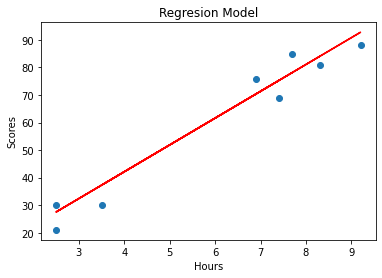

In [8]:
ex1_data.plot_scatter_and_regression()

#### Porównanie metryk i walidacja danych:

In [9]:
ex1_data.print_errors()

Mean absolute error = 5.349006066017169
Mean squared error = 31.36383947643328
Root Mean Squared Error = 5.600342799903706 


**Wnioski:**
Jak możemy zauważyć stworzony model dobrze przewiduje wartości zmiennej zależnej, co potwierdza wykres regresji oraz współczynniki poszczególnych błędów.

## Plik sbp.csv

In [10]:
ex1_data2 = LinearRegressionExercise('SBP.csv')
ex1_data2.data.head()

,Age,SBP
0,60,117
1,61,120
2,74,145
3,57,129
4,63,132


In [11]:
ex1_data2.data.describe()

,Age,SBP
count,19.000000,19.000000
mean,64.947368,129.421053
std,7.214751,13.454928
min,54.000000,111.000000
25%,60.500000,119.000000
50%,63.000000,129.000000
75%,68.500000,137.000000
max,79.000000,163.000000


#### Wstępny wykres analizowanych danych:

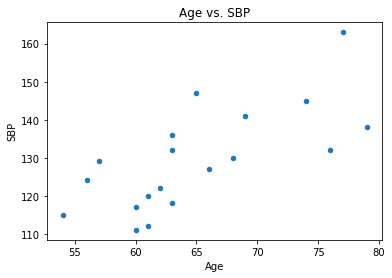

In [12]:
ex1_data2.scatter_plot(title_= "Age vs. SBP", x_="Age", y_="SBP")

#### Obliczenie regresji oraz podanie jej współczynników

In [13]:
ex1_data2.do_regression(x_column_name="Age", y_column_name="SBP")
print(f'Regression coefficient: {ex1_data2.coef}')
print(f'Intercept: {ex1_data2.intercept}')

Regression coefficient: [1.4582266]
Intercept: 35.04857142857142


In [14]:
print(f"y_predicted = {ex1_data2.y_predicted}\n")
print(f"y_test = {ex1_data.y_test}\n")
print(f"|y_test - y_predicted| = {np.abs(ex1_data2.y_test - ex1_data2.y_predicted)}\n")

y_predicted = [126.91684729 122.54216749 129.83330049 145.8737931  126.91684729
 131.29152709]

y_test = [85 30 69 21 76 88 30 81]

|y_test - y_predicted| = [ 8.91684729  5.54216749 17.16669951 13.8737931   9.08315271  4.29152709]



#### Wykres regresji:

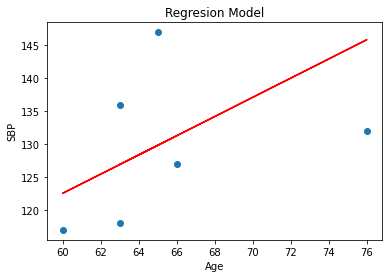

In [15]:
ex1_data2.plot_scatter_and_regression()

#### Porównanie metryk i walidacja danych:

In [16]:
ex1_data2.print_errors()

Mean absolute error = 9.812364532019709
Mean squared error = 116.38739350950851
Root Mean Squared Error = 10.78829891639588 


**Wnioski:**

Dla tego zestawu danych regresja już gorzej przewiduje wartości zmiennej zależnej, orygninalne wartości są wyraźnie bardziej rozrzucone wokół prostej regresji. Widać również wyższe wartości poszczególnych błędów.

### Zadanie 2
Na podstawie danych zawartych w pliku PETROL.csv wykonaj i oceń regresję liniową. Jako daną zależną wykorzystaj zużycie paliwa, a pozostałe - jako predyktory. Wykonanie zadania powinno składać się z kroków podobnych do tych z zadania poprzedniego.

Czy uzyskane wyniki predykcji modelu są dobre? Co mogło mieć pozytywny/negatywny wpływ na taki wynik?

In [17]:
petrol_ex = LinearRegressionExercise("Petrol.csv")
petrol_ex.data.head()

,Podatek_paliwowy,Sredni_przychod,Utwardzone_autostrady,Procent_ludnosci_z_prawem_jazdy,Zuzycie_paliwa
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [18]:
petrol_ex.data.describe()

,Podatek_paliwowy,Sredni_przychod,Utwardzone_autostrady,Procent_ludnosci_z_prawem_jazdy,Zuzycie_paliwa
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


#### Obliczenie regresji oraz podanie jej współczynników

In [19]:
petrol_ex.do_regression(y_column_name='Zuzycie_paliwa', 
                        x_column_name=['Podatek_paliwowy','Sredni_przychod','Utwardzone_autostrady','Procent_ludnosci_z_prawem_jazdy'])

print(f'Regression coefficient: {petrol_ex.coef}')
print(f'Intercept: {petrol_ex.intercept}')


Regression coefficient: [-3.45356858e+01 -8.11996683e-02 -8.22243780e-04  1.28066394e+03]
Intercept: 459.92566657394104


In [20]:
print(f"y_predicted = {petrol_ex.y_predicted}\n")
print(f"y_test = {petrol_ex.y_test}\n")

print(f"|y_test - y_predicted| = {np.abs(petrol_ex.y_predicted - petrol_ex.y_test)}\n")

y_predicted = [654.79978124 669.78503691 549.48693606 638.26879388 675.9523816
 500.96102073 498.45743069 599.09609889 687.86452603 722.75861507
 551.73463139 625.45544689 410.96324109 517.97734872 403.87531863]

y_test = [587 577 540 632 640 580 460 554 649 968 498 628 457 487 464]

|y_test - y_predicted| = [ 67.79978124  92.78503691   9.48693606   6.26879388  35.9523816
  79.03897927  38.45743069  45.09609889  38.86452603 245.24138493
  53.73463139   2.54455311  46.03675891  30.97734872  60.12468137]



In [21]:
petrol_ex.print_errors()

Mean absolute error = 56.8272882000933
Mean squared error = 6375.27796546013
Root Mean Squared Error = 79.84533778161459 


#### Wnioski:

Wyniki predykcji dla tego modelu nie są zadowalające. Dane pochodzące z predykcji różnią się znacznie od danych testowych - pokazuje to szczególnie bardzo wysoka wartość błędu średniokwadratowego. 

### Regresja logistyczna

Naturalnym rozwojem modeli linowych, są uogólnione modele liniowe (*generalized linear models*). 

Ich przewodnią ideą jest to, że zamiast reprezentować zmienną zależną jako kombinację liniową niezależnych, staramy się stworzyć model liniowy pewnej funkcji zmiennej zależnej.

$$ f(y) =  \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n$$

wymaga się, aby funkcja ta była odwracalna, dzięki czemu 

$$ y = f^{-1} ( \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n)$$

Takie przekształcenie stosujemy wtedy, gdy zbiór wartości zmiennej zależnej nie jest całym zbiorem liczb rzeczywistych tylko jest w jakiś sposób ograniczony. Na przykład do przedziału $[0,1]$, do wartości dodatnich lub wartości całkowitych. W tens posób można wybrać funkcję $f$, której dziedziną jest zbiór wartości $y$ zaś obrazem jest zbiór liczb rzeczywistych.

Jedną z takich funkcji jest tzw. funkcja logistyczna, która odpowiada zbiorowi $[0,1]$ przez co często jest wykorzystywana do analizy prawdopodobieństwa przynależności do danej klasy, lub też inaczej jako klasyfikator.

W takiej sytuacji zmienne zależne powinny przyjmować wyłącznie wartości $0$ i $1$ co odpowiada temu czy dany punkt należy do interesującej klasy. Model logistyczny poznwala na określenie estymaty prawdopodobieństwa, czy punkt należy czy nie do danej klasy. 

Do tworzenia modeli logistycznyc służy klasa: ```LogisticRegression```

### Zadanie 3

Na podstawie danych zawartych w pliku HEART.csv wykonaj i oceń regresję logistyczną, gdzie Twoją daną zależną jest kolumna "num". Wykonanie zadania powinno składać się z następujących kroków:

1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.
2. Odczytanie danych z pliku HEART.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.
3. Przetworzenie danych, tj: oznaczenie braku danych ("?") na NaN, usunięcię kolumn zawierających zbyt dużo brakujących danych (3 kolumny), usunięcie wierszy z brakującymi wartościami.
4. Zakoduj niezależne zmienne kategorialne np: jako wartości "dummy", za pomoca metody get_dummies(). Zmienne kategorialne to takie, które reprezentuja przynależność do kategorii. W przypadku naszych odfiltrowanych danych będą to kolumny: cp, restecg, fbs, sex, exang. Jako, że trzy ostatnie już zapisane są w formie 0 i 1 tylko cp i restecg wymagają tej operacji.
5. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zależnych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (20%).
6. Utwróz model regresji logistycznej.
7. Oceń wynik za pomocą dostępnych metryk (np: metody związane z modelem czy classification_report() z sklearn)

Możesz również spróbować ustandaryzować dane (np: poprzez skalowanie) po podziale na zbiory treningowy i testowy.

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
heart = pd.read_csv('HEART.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


In [24]:
heart.describe()

,age,sex,cp,oldpeak,num
count,294.000000,294.000000,294.000000,294.000000,294.000000
mean,47.826531,0.724490,2.982993,0.586054,0.360544
std,7.811812,0.447533,0.965117,0.908648,0.480977
min,28.000000,0.000000,1.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,1.000000,1.000000
max,66.000000,1.000000,4.000000,5.000000,1.000000


In [25]:
heart[heart=="?"] = np.nan
heart.isna().sum()

age             0
sex             0
cp              0
trestbps        1
chol           23
fbs             8
restecg         1
thalach         1
exang           1
oldpeak         0
slope         190
ca            291
thal          266
num             0
dtype: int64

In [26]:
heart.drop(['slope','ca','thal'],axis=1,inplace=True)

In [27]:
heart.dropna(axis=0,inplace=True)

In [28]:
heart = pd.get_dummies(heart, columns = ['cp', 'restecg'])
heart

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,num,cp_1,cp_2,cp_3,cp_4,restecg_0,restecg_1,restecg_2
0,28,1,130,132,0,185,0,0.0,0,0,1,0,0,0,0,1
1,29,1,120,243,0,160,0,0.0,0,0,1,0,0,1,0,0
3,30,0,170,237,0,170,0,0.0,0,1,0,0,0,0,1,0
4,31,0,100,219,0,150,0,0.0,0,0,1,0,0,0,1,0
5,32,0,105,198,0,165,0,0.0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,160,331,0,94,1,2.5,1,0,0,0,1,1,0,0
290,54,0,130,294,0,100,1,0.0,1,0,0,1,0,0,1,0
291,56,1,155,342,1,150,1,3.0,1,0,0,0,1,1,0,0
292,58,0,180,393,0,110,1,1.0,1,0,1,0,0,1,0,0


In [29]:
x = heart.drop(['num       '],axis=1)
y = heart.drop(x,axis=1)
x = x.to_numpy()
y = y.to_numpy()

In [30]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y,test_size=0.2,random_state=30)

In [31]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(x_train,y_train.ravel())
y_pred = pipe.predict(x_test)

In [32]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        33
           1       0.76      0.65      0.70        20

    accuracy                           0.79        53
   macro avg       0.79      0.76      0.77        53
weighted avg       0.79      0.79      0.79        53



**Wnioski:**

Stworzony model regresji logistycznej dobrze spisał się przy klasyfikacji wartości 0  - wskaźniki precyzji (precision  = true positive/selected) i czułości (recall = true positive/relevant) są na poziomie ponad 80%.

Gorsze wyniki otrzymano przy klasyfikacji do wartości 1 - otrzymano zdecydowanie niższe wskaźniki precyzji oraz czułosci.